In [ ]:
# 5.Experiment Title: Detection and smoothening of outliers in the dataset.

# Pre lab:

# 1)	Define an outlier in a dataset?

# A. An outlier is a dataset is an observation or data point that significantly
    #  differs from the other observations in the dataset.

# 2)	Explain the methods used for identifying outliers

# A. 1.Z-Score Methos
    # 2.Interquartile Range (IQR) Method
    # 3. Box Plot Method

# 3)	Discuss the effects of outliers on statistical measures and models used in data analysis.

# A. Outliers can have significant effects on statistical measures and models used in data analysis.
# Their impact varies depending on the measure or model in question
# but generally, they can lead to biased or misleading results. Here are some specific effects of outliers on statistical measures and models

# 4)	Describe various approaches for managing outliers in datasets.

# A. Z-score
    #  IQR
    # Visual Inspection




In [1]:
# In-lab:

# 1)	Write a python program to identify outliers in the data set using IQR,Z-scores?

import pandas as pd
import numpy as np
from scipy.stats import zscore

data = {'values': [3, 7, 7, 2, 5, 10, 7, 9, 100, -20, 4, 6, 8]}
df = pd.DataFrame(data)


def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def identify_outliers_zscore(df, column, threshold=3):
    df['z_score'] = zscore(df[column])
    outliers = df[np.abs(df['z_score']) > threshold]
    df.drop(columns=['z_score'], inplace=True)
    return outliers

iqr_outliers = identify_outliers_iqr(df, 'values')
print("Outliers using IQR method:\n", iqr_outliers)

zscore_outliers = identify_outliers_zscore(df, 'values')
print("\nOutliers using Z-score method:\n", zscore_outliers)




Outliers using IQR method:
    values
8     100
9     -20

Outliers using Z-score method:
    values   z_score
8     100  3.331623


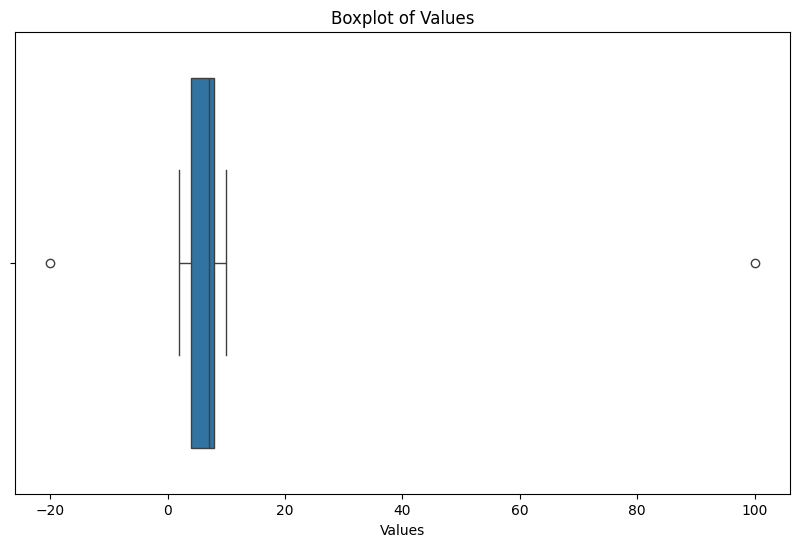

In [2]:
# 2)	Write a python program for Boxplot visualization to identify outliers visually

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {'values': [3, 7, 7, 2, 5, 10, 7, 9, 100, -20, 4, 6, 8]}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['values'])
plt.title('Boxplot of Values')
plt.xlabel('Values')
plt.show()



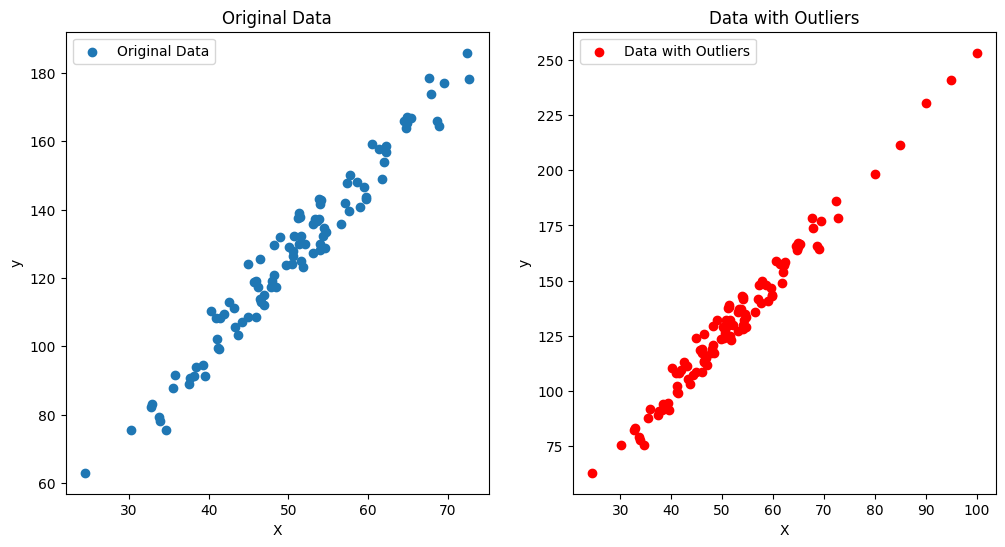

Original Data Regression:
Mean Squared Error: 26.429296354765707
R-squared: 0.9617401142419032
Intercept: -2.491695413396897, Coefficient: 2.5573492167731904

Data with Outliers Regression:
Mean Squared Error: 25.510085878552726
R-squared: 0.9774058687986246
Intercept: -2.2176723707617043, Coefficient: 2.5513256637422805


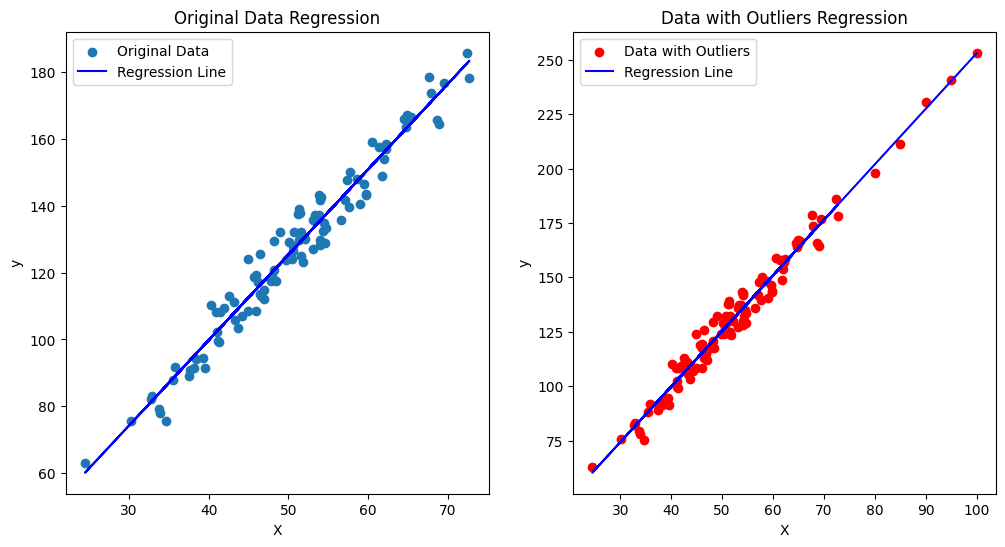

In [3]:
# 3)	Write a python program to find out impact analysis on sample data with and without outliers.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
X = np.random.normal(50, 10, 100)
y = 2.5 * X + np.random.normal(0, 5, 100)

data = pd.DataFrame({'X': X, 'y': y})

outliers_X = np.array([80, 85, 90, 95, 100])
outliers_y = 2.5 * outliers_X + np.random.normal(0, 5, 5)
outliers = pd.DataFrame({'X': outliers_X, 'y': outliers_y})

data_with_outliers = pd.concat([data, outliers])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['X'], data['y'], label='Original Data')
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data_with_outliers['X'], data_with_outliers['y'], color='red', label='Data with Outliers')
plt.title('Data with Outliers')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

def perform_regression(X, y):
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X.reshape(-1, 1))
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return model, mse, r2


model_original, mse_original, r2_original = perform_regression(data['X'].values, data['y'].values)

model_outliers, mse_outliers, r2_outliers = perform_regression(data_with_outliers['X'].values, data_with_outliers['y'].values)

print("Original Data Regression:")
print(f"Mean Squared Error: {mse_original}")
print(f"R-squared: {r2_original}")
print(f"Intercept: {model_original.intercept_}, Coefficient: {model_original.coef_[0]}")

print("\nData with Outliers Regression:")
print(f"Mean Squared Error: {mse_outliers}")
print(f"R-squared: {r2_outliers}")
print(f"Intercept: {model_outliers.intercept_}, Coefficient: {model_outliers.coef_[0]}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['X'], data['y'], label='Original Data')
plt.plot(data['X'], model_original.predict(data['X'].values.reshape(-1, 1)), color='blue', label='Regression Line')
plt.title('Original Data Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data_with_outliers['X'], data_with_outliers['y'], color='red', label='Data with Outliers')
plt.plot(data_with_outliers['X'], model_outliers.predict(data_with_outliers['X'].values.reshape(-1, 1)), color='blue', label='Regression Line')
plt.title('Data with Outliers Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Original Dataset Statistics
             Age         Income    Student  Credit_rating  Buys_computer
count  15.000000      15.000000  15.000000      15.000000      15.000000
mean   34.333333   98666.666667   0.533333       0.466667       0.533333
std     8.837151   70494.849525   0.516398       0.516398       0.516398
min    25.000000   40000.000000   0.000000       0.000000       0.000000
25%    25.000000   55000.000000   0.000000       0.000000       0.000000
50%    35.000000   75000.000000   1.000000       0.000000       1.000000
75%    35.000000  105000.000000   1.000000       1.000000       1.000000
max    55.000000  300000.000000   1.000000       1.000000       1.000000


Model Performance on Original Dataset:
Accuracy: 0.2
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.00      0.00      0.00         3

    accuracy                           0.20         5
   macro avg       0.12      0.25      0.1

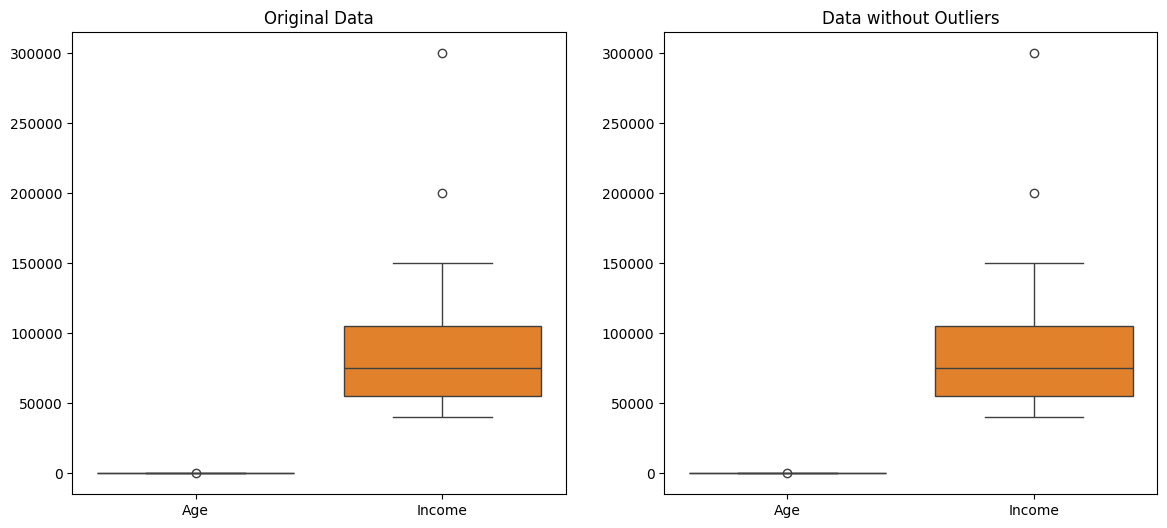

In [4]:
# 4)	Write a python program to perform data integration on sample data sets.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


data = {
    'Age': [25, 35, 45, 35, 25, 35, 55, 35, 25, 35, 45, 25, 35, 35, 25],
    'Income': [40000, 60000, 80000, 150000, 50000, 70000, 120000, 75000, 45000, 90000, 200000, 50000, 65000, 85000, 300000],
    'Student': ['No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes'],
    'Credit_rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Excellent', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Excellent'],
    'Buys_computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)


df['Student'] = df['Student'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Credit_rating'] = df['Credit_rating'].apply(lambda x: 1 if x == 'Excellent' else 0)
df['Buys_computer'] = df['Buys_computer'].apply(lambda x: 1 if x == 'Yes' else 0)

def remove_outliers_zscore(df, column):
    z_scores = zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    return df[filtered_entries]


def print_statistics(df, title):
    print(title)
    print(df.describe())
    print("\n")


def evaluate_model(df):
    X = df[['Age', 'Income', 'Student', 'Credit_rating']]
    y = df['Buys_computer']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

print_statistics(df, "Original Dataset Statistics")

print("Model Performance on Original Dataset:")
evaluate_model(df)

df_no_outliers = df.copy()
for column in ['Age', 'Income']:
    df_no_outliers = remove_outliers_zscore(df_no_outliers, column)

print_statistics(df_no_outliers, "Dataset Statistics without Outliers")

print("Model Performance on Dataset without Outliers:")
evaluate_model(df_no_outliers)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['Age', 'Income']])
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers[['Age', 'Income']])
plt.title('Data without Outliers')

plt.show()


In [5]:
# Post lab:
# Write a python program to identify outliers using below methods on the sample data.
# Data set: 180 	156	9	176	163	18 27	166	171
# 1.	Sorting method

import numpy as np


data = np.array([180, 156, 9, 176, 163, 18, 27, 166, 171])


sorted_data = np.sort(data)

print("Sorted Data:")
print(sorted_data)

threshold_low = sorted_data[2] * 1.5
threshold_high = sorted_data[-3] * 1.5

low_outliers = sorted_data[sorted_data < threshold_low]
high_outliers = sorted_data[sorted_data > threshold_high]

print("\nLow Outliers:")
print(low_outliers)
print("\nHigh Outliers:")
print(high_outliers)

outliers = np.concatenate((low_outliers, high_outliers))

print("\nAll Identified Outliers:")
print(outliers)





Sorted Data:
[  9  18  27 156 163 166 171 176 180]

Low Outliers:
[ 9 18 27]

High Outliers:
[]

All Identified Outliers:
[ 9 18 27]


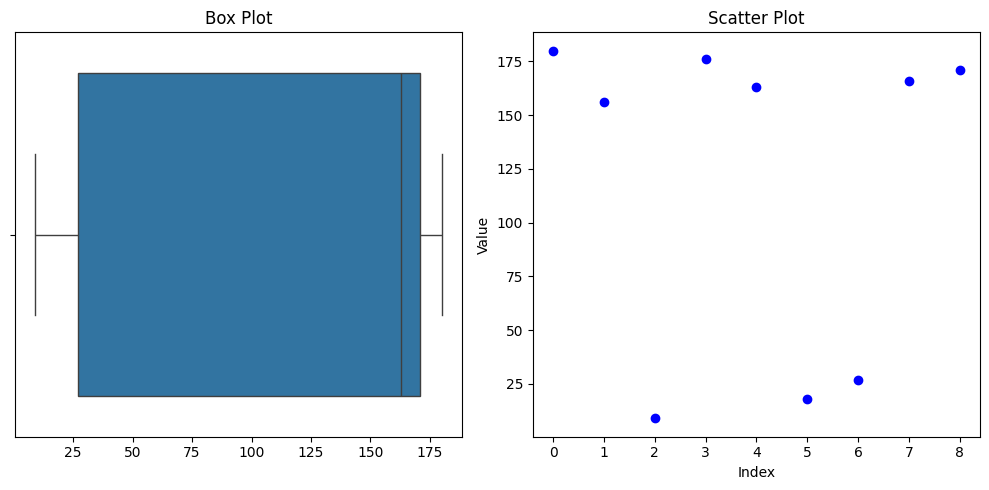

In [6]:
# 2.	Data visualization method

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = np.array([180, 156, 9, 176, 163, 18, 27, 166, 171])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, orient='h')
plt.title('Box Plot')


plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(data)), data, color='blue')
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [7]:
# 3.	Statistical tests (z scores)

import numpy as np

data = np.array([180, 156, 9, 176, 163, 18, 27, 166, 171])

mean = np.mean(data)
std_dev = np.std(data)

z_scores = (data - mean) / std_dev


threshold = 3

outliers = data[np.abs(z_scores) > threshold]

print("Identified outliers using Z-scores:")
print(outliers)


Identified outliers using Z-scores:
[]


In [9]:
# 4.	Interquartile range method

import numpy as np

# Given dataset
data = np.array([180, 156, 9, 176, 163, 18, 27, 166, 171])


Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

IQR = Q3 - Q1


threshold_low = Q1 - 1.5 * IQR
threshold_high = Q3 + 1.5 * IQR

outliers = data[(data < threshold_low) | (data > threshold_high)]

print("Identified outliers using IQR method:")
print(outliers)


Identified outliers using IQR method:
[]
